<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1: Logistic Regression
Name: Ojasa Chitre


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Outcomes:

1. To learn how to define, fit, and use a model in Python

2. To interpret the results

In [26]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns; sns.set_theme()
from sklearn.model_selection import GridSearchCV
import seaborn as sns

#Logistic Regression

##Step 1: Loading the dataset

The loaded dataset is for horse colic data. It is used to predict who would live and who would die. 

In [3]:
horse_data = pd.read_csv('/content/drive/MyDrive/Sem8/DS/Lab/horse.csv')

In [4]:
horse_data.shape

(299, 28)

In [5]:
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
horse_data['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [7]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

From the above information we can see that the columns 3 through 21 all have null values.

##Step 2: Data Preprocessing

In [8]:
cols_to_remove = []
for col in horse_data.columns[3:22]:
  print(col)
  null_percentage = (horse_data[col].isna().sum()*100)/len(horse_data)
  print(null_percentage)
  if null_percentage > 50.0:
    cols_to_remove.append(col)
    print("To be removed")
  print()

rectal_temp
20.066889632107024

pulse
8.02675585284281

respiratory_rate
19.39799331103679

temp_of_extremities
18.729096989966557

peripheral_pulse
23.076923076923077

mucous_membrane
15.719063545150501

capillary_refill_time
10.702341137123746

pain
18.39464882943144

peristalsis
14.715719063545151

abdominal_distention
18.729096989966557

nasogastric_tube
34.78260869565217

nasogastric_reflux
35.45150501672241

nasogastric_reflux_ph
82.27424749163879
To be removed

rectal_exam_feces
34.11371237458194

abdomen
39.46488294314381

packed_cell_volume
9.698996655518394

total_protein
11.036789297658864

abdomo_appearance
55.18394648829432
To be removed

abdomo_protein
66.22073578595318
To be removed



In [9]:
cols_to_remove

['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein']

In [10]:
horse_data.drop(cols_to_remove,  axis='columns', inplace=True)

In [11]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  rectal

Now looking at the columns that are nan and the unique values in the columns with null values

In [12]:
for col in horse_data.columns[3:19]:
  print(col)
  print(len(horse_data[col].unique()), len(horse_data[col]))
  print(horse_data[col].unique())
  print()

rectal_temp
41 299
[38.5 39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4
 39.9 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]

pulse
53 299
[ 66.  88.  40. 164. 104.  nan  48.  60.  80.  90.  72.  42.  92.  76.
  96. 128.  64. 110. 130. 108. 100. 112.  52. 146. 150. 120. 140.  84.
  46. 114. 160.  54.  56.  38.  98.  50.  44.  70.  78.  49.  30. 136.
 132.  65.  86. 129.  68.  36.  45. 124. 184.  75.  82.]

respiratory_rate
41 299
[28. 20. 24. 84. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 96. 72.
 15. 44. 32. 22. 18. 80. 40. 10. 51. 68. 66.  9. 14. 90.  8. 23. 58. 13.
 70. 26. 88. 25. 50.]

temp_of_extremities
5 299
['cool' nan 'normal' 'cold' 'warm']

peripheral_pulse
5 299
['reduced' nan 'normal' 'absent' 'increased']

mucous_membrane
7 299
[nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink'
 'bright_red' 'bright_pink']

capillary_refill_time
4 299
['more_3_sec' 'les

In [13]:
{column: list(horse_data[column].unique()) for column in horse_data.select_dtypes('object').columns}

{'abdomen': ['distend_large', 'other', 'normal', nan, 'firm', 'distend_small'],
 'abdominal_distention': ['severe', 'slight', 'none', nan, 'moderate'],
 'age': ['adult', 'young'],
 'capillary_refill_time': ['more_3_sec', 'less_3_sec', nan, '3'],
 'cp_data': ['no', 'yes'],
 'mucous_membrane': [nan,
  'pale_cyanotic',
  'pale_pink',
  'dark_cyanotic',
  'normal_pink',
  'bright_red',
  'bright_pink'],
 'nasogastric_reflux': [nan, 'less_1_liter', 'none', 'more_1_liter'],
 'nasogastric_tube': [nan, 'none', 'slight', 'significant'],
 'outcome': ['died', 'euthanized', 'lived'],
 'pain': ['extreme_pain',
  'mild_pain',
  'depressed',
  nan,
  'severe_pain',
  'alert'],
 'peripheral_pulse': ['reduced', nan, 'normal', 'absent', 'increased'],
 'peristalsis': ['absent', 'hypomotile', nan, 'hypermotile', 'normal'],
 'rectal_exam_feces': ['decreased', 'absent', 'normal', nan, 'increased'],
 'surgery': ['no', 'yes'],
 'surgical_lesion': ['no', 'yes'],
 'temp_of_extremities': ['cool', nan, 'normal', 

In [14]:
categorical_columns = []
for col in horse_data.columns:
  if np.issubdtype(horse_data[col].dtype,object):
    print('\nCategorical')
    print(col,horse_data[col].mode()[0])
    horse_data[col] = horse_data[col].fillna(horse_data[col].mode()[0])
    categorical_columns.append(col)
    
  else:
    print('\nNon-categorical')
    print(col,horse_data[col].mean())
    horse_data[col] = horse_data[col].fillna(horse_data[col].median())


Categorical
surgery yes

Categorical
age adult

Non-categorical
hospital_number 1087732.7023411372

Non-categorical
rectal_temp 38.16861924686195

Non-categorical
pulse 72.0

Non-categorical
respiratory_rate 30.46058091286307

Categorical
temp_of_extremities cool

Categorical
peripheral_pulse normal

Categorical
mucous_membrane normal_pink

Categorical
capillary_refill_time less_3_sec

Categorical
pain mild_pain

Categorical
peristalsis hypomotile

Categorical
abdominal_distention none

Categorical
nasogastric_tube slight

Categorical
nasogastric_reflux none

Categorical
rectal_exam_feces absent

Categorical
abdomen distend_large

Non-categorical
packed_cell_volume 46.30740740740741

Non-categorical
total_protein 24.27443609022557

Categorical
outcome lived

Categorical
surgical_lesion yes

Non-categorical
lesion_1 3659.7090301003345

Non-categorical
lesion_2 90.52842809364549

Non-categorical
lesion_3 7.3879598662207355

Categorical
cp_data no


In [15]:
for col in horse_data.columns:
  null_percentage = (horse_data[col].isna().sum()*100)/299
  if null_percentage != 0.0:
    print(col)
    print(null_percentage)
    print()

In [16]:
# horse_data["outcome"].replace({"euthanized": "died"}, inplace=True)

In [17]:
horse_data['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [18]:
labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
  horse_data[col] = labelencoder.fit_transform(horse_data[col])

In [19]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    int64  
 7   peripheral_pulse       299 non-null    int64  
 8   mucous_membrane        299 non-null    int64  
 9   capillary_refill_time  299 non-null    int64  
 10  pain                   299 non-null    int64  
 11  peristalsis            299 non-null    int64  
 12  abdominal_distention   299 non-null    int64  
 13  nasogastric_tube       299 non-null    int64  
 14  nasogastric_reflux     299 non-null    int64  
 15  rectal

In [20]:
{column: list(horse_data[column].unique()) for column in horse_data.select_dtypes('object').columns}

{}

##Step 3: Exploratory Data Analysis

In [21]:
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,2,0,2,2,2,1,0,45.0,8.4,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,3,0,3,2,2,0,4,50.0,85.0,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,3,2,1,2,2,3,3,33.0,6.7,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,1,0,2,0,0,1,0,48.0,7.2,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,3,2,1,2,2,0,0,74.0,7.4,0,0,4300,0,0,0


In [22]:
horse_data['outcome'].unique()

array([0, 1, 2])

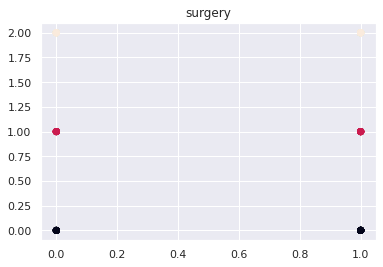

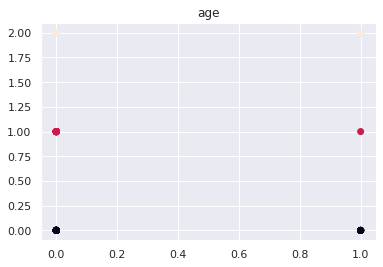

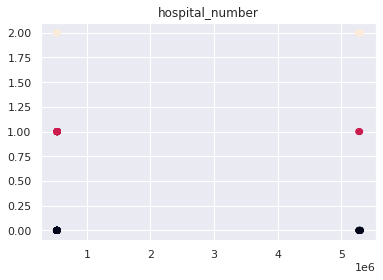

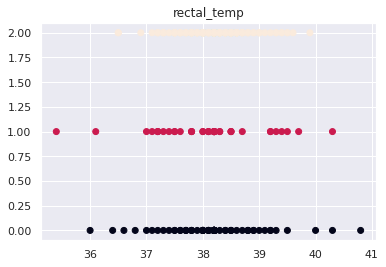

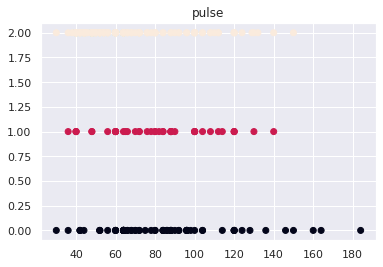

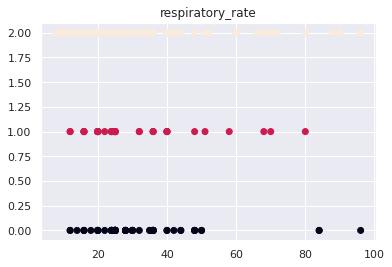

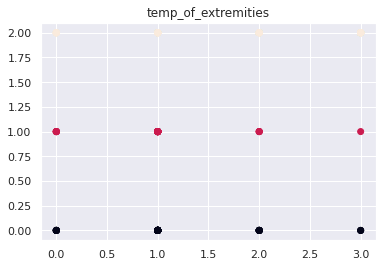

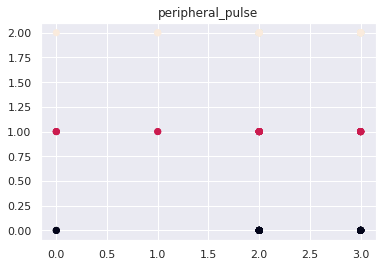

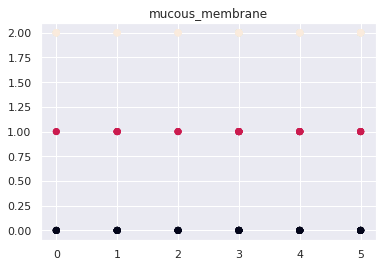

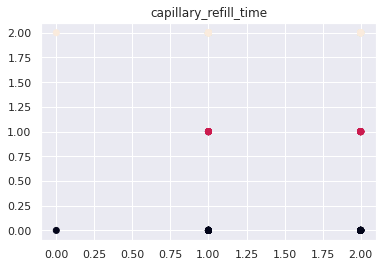

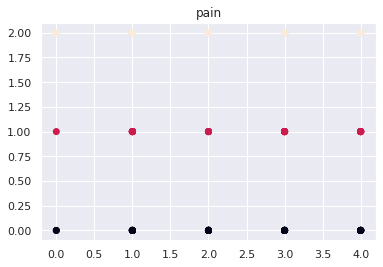

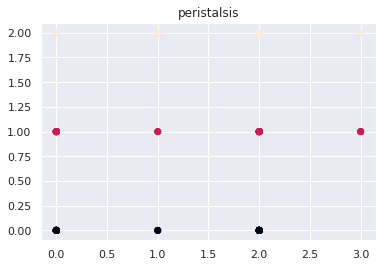

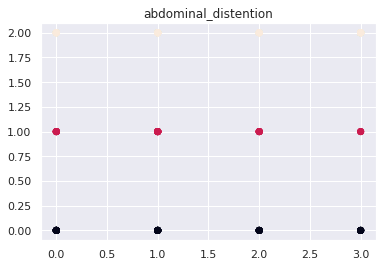

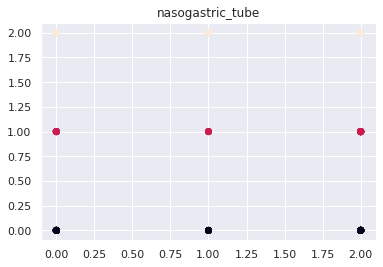

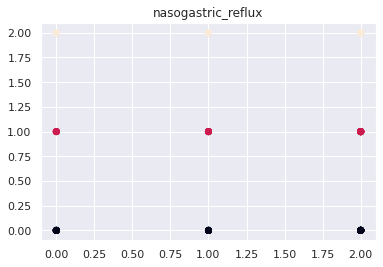

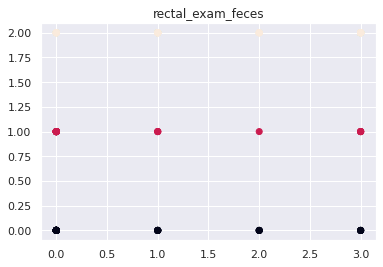

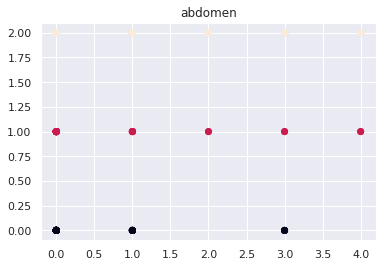

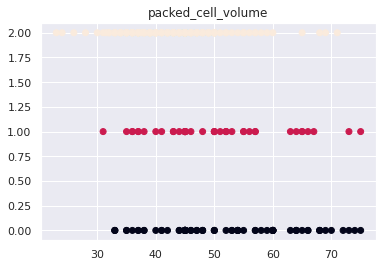

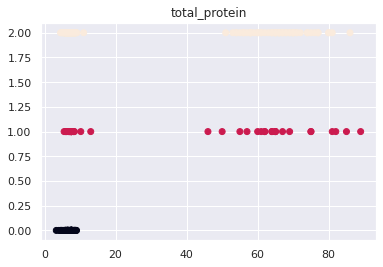

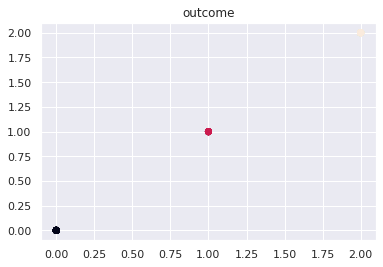

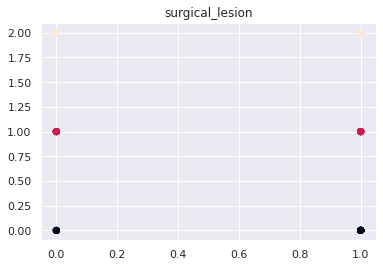

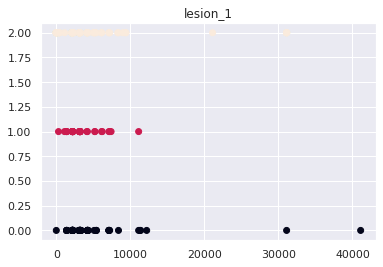

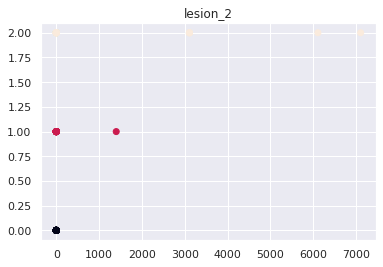

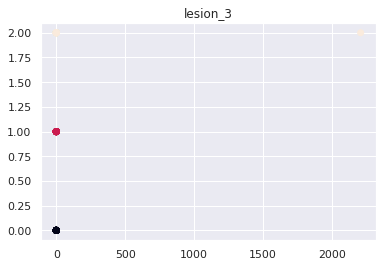

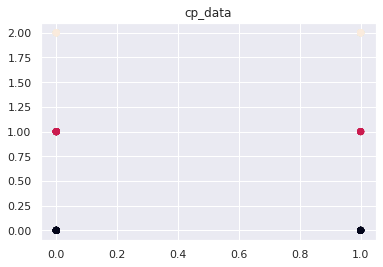

In [23]:
for col in horse_data.columns:
  plt.scatter(horse_data[col], horse_data['outcome'], c=horse_data['outcome'])
  plt.title(col)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


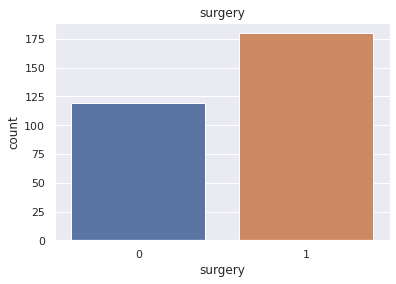

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


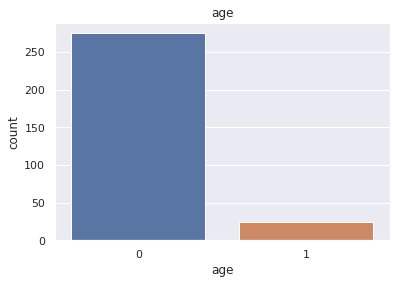

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


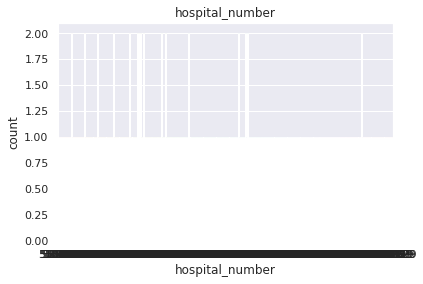

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


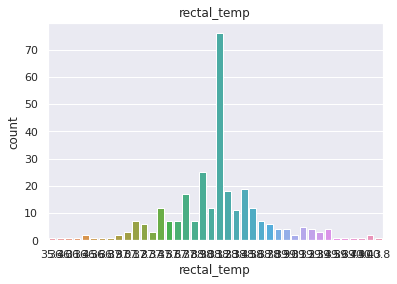

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


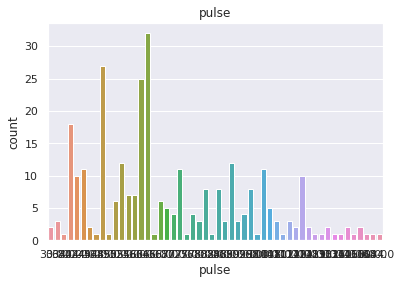

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


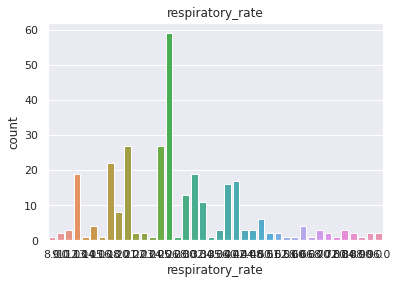

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


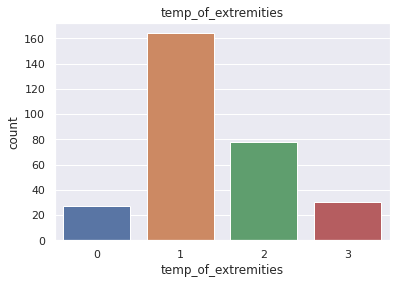

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


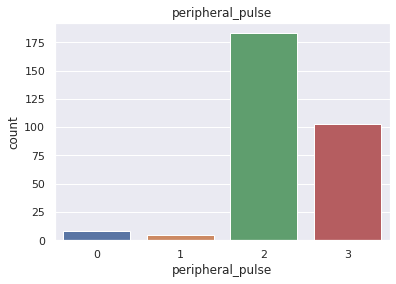

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


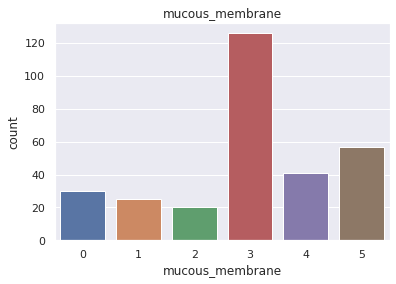

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


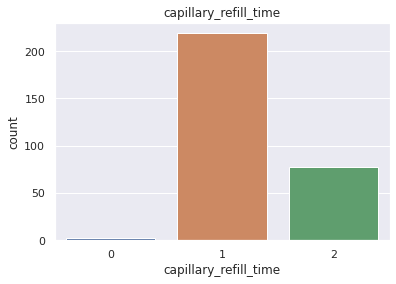

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


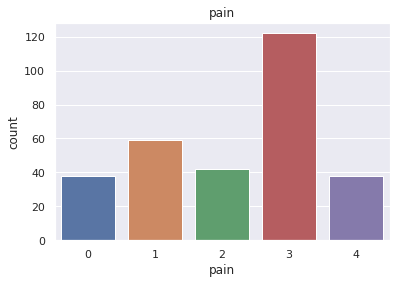

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


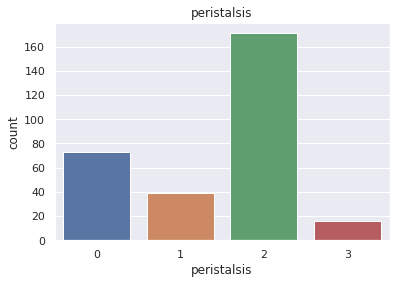

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


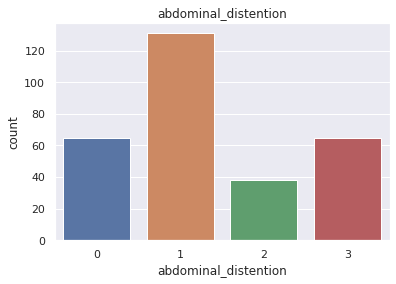

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


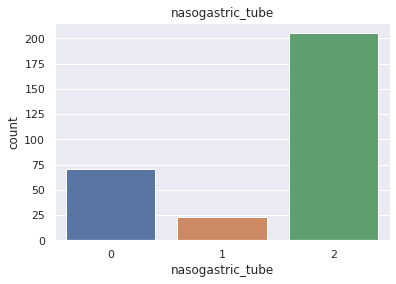

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


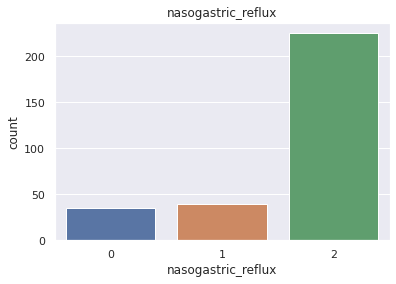

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


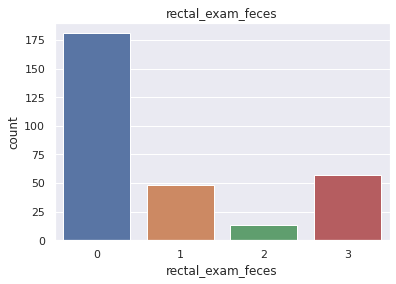

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


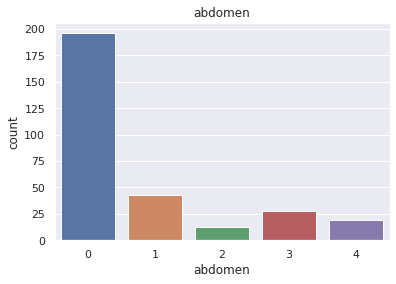

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


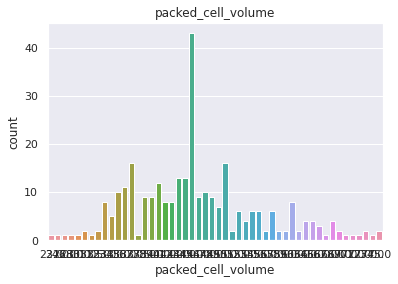

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


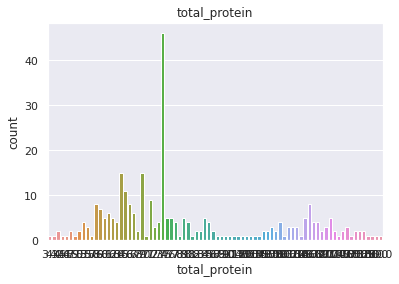

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


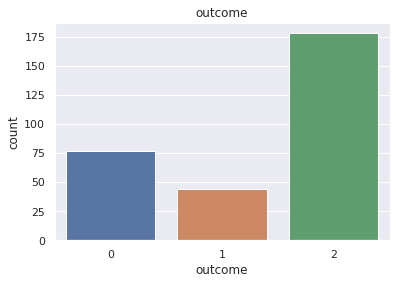

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


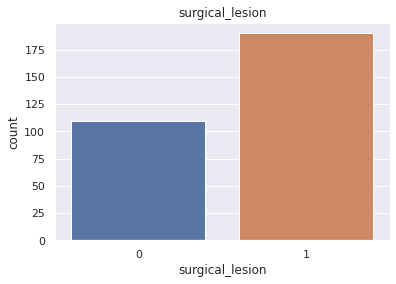

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


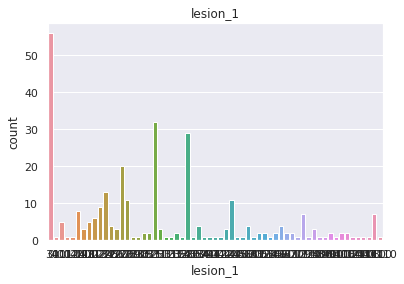

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


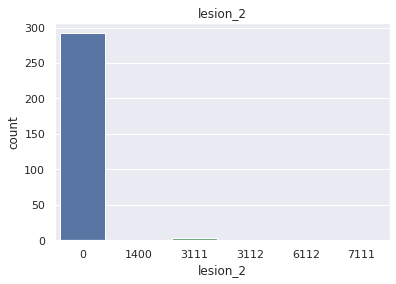

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


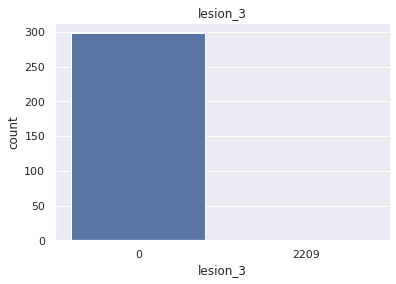

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


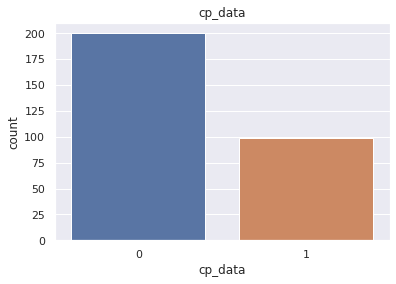

In [29]:
for col in horse_data.columns:
  sns.countplot(horse_data[col])
  plt.title(col)
  plt.show()

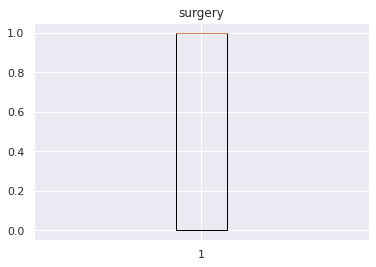

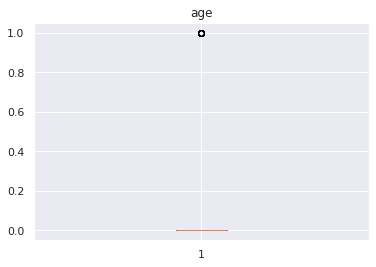

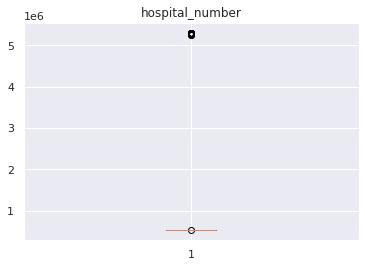

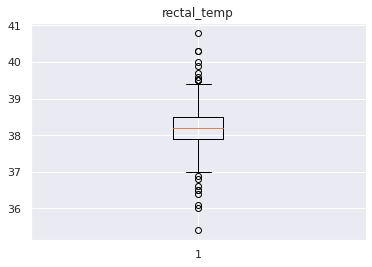

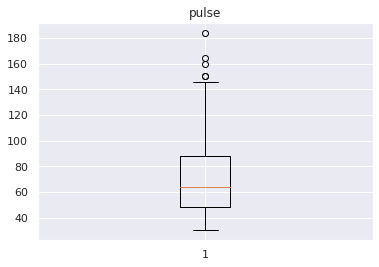

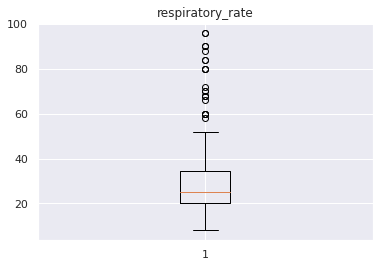

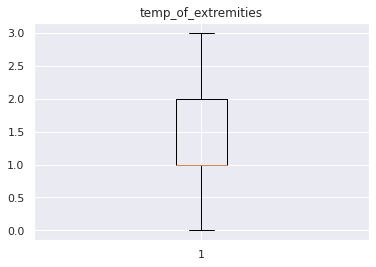

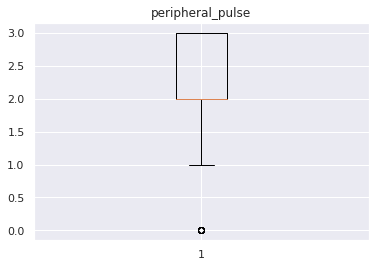

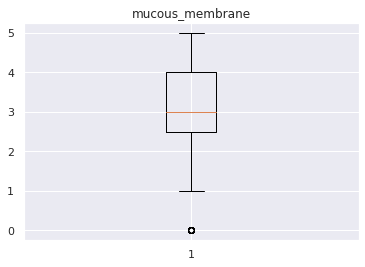

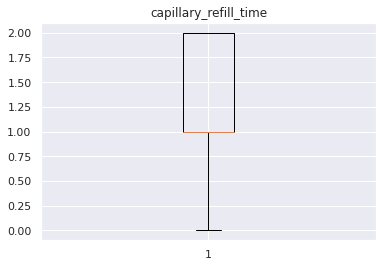

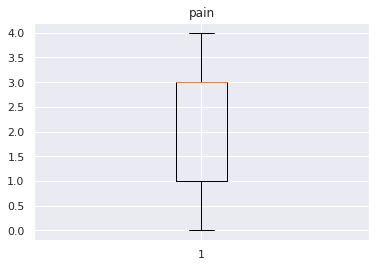

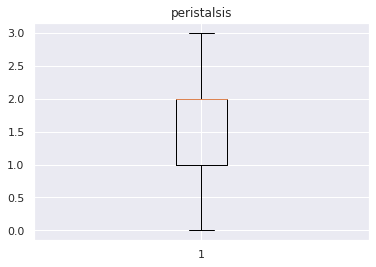

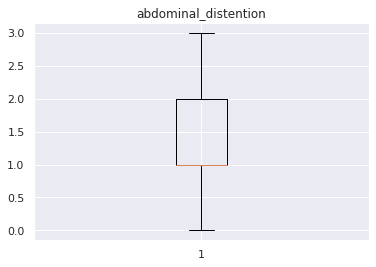

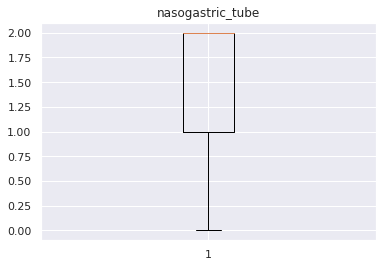

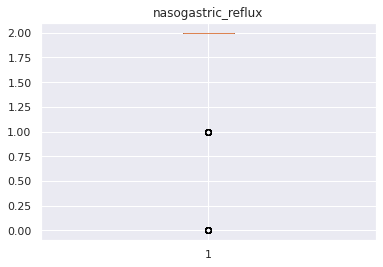

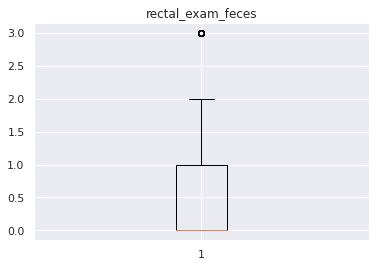

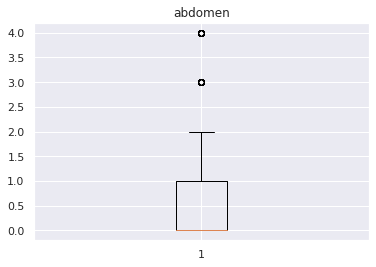

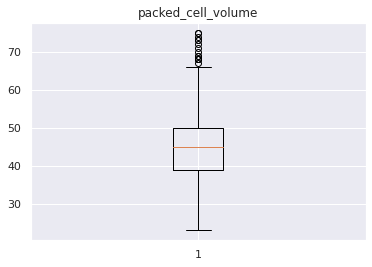

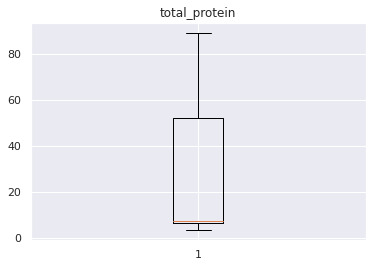

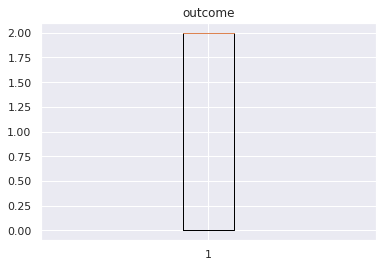

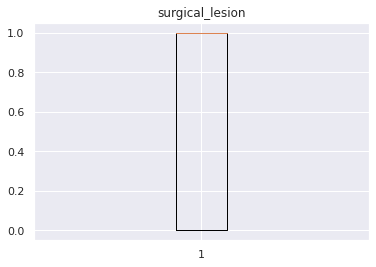

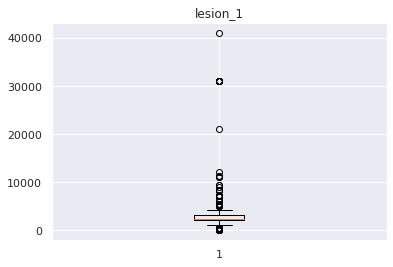

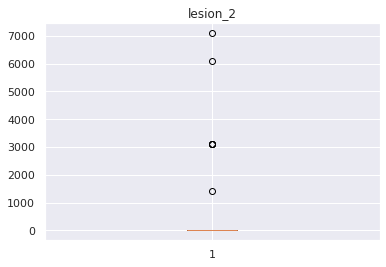

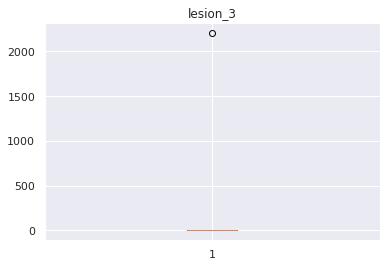

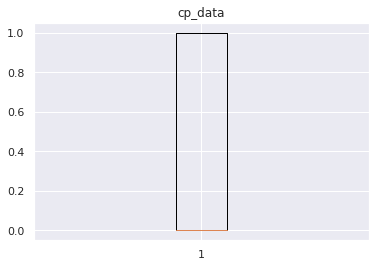

In [27]:
for col in horse_data.columns:
  plt.boxplot(horse_data[col])
  plt.title(col)
  plt.show()

##Step 4: Data Partition
I have used stratify to maintain the percentage of outcome distribution

In [26]:
X = horse_data.drop(['outcome'],axis=1)
y = horse_data['outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Step 5: Build model

In [28]:
LogReg = LogisticRegression(penalty = 'elasticnet',C = 1, max_iter=10000, random_state = 42,solver='saga',l1_ratio=0.5)

##Step 6: Summarize model

In [29]:
LogReg.get_params(deep=True)

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
LogReg.fit(X_train,y_train)

LogisticRegression(C=1, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=42, solver='saga')

##Step 7: Prediction

In [31]:
predictions = LogReg.predict(X_test)

##Step 8: Evaluate

In [32]:
score = LogReg.score(X_test, y_test)
print(score)

0.6


In [33]:
cm = metrics.confusion_matrix(y_test.values, predictions)
print(cm)

[[ 0  0 15]
 [ 0  0  9]
 [ 0  0 36]]


Text(0.5, 12.5, 'Predicted label')

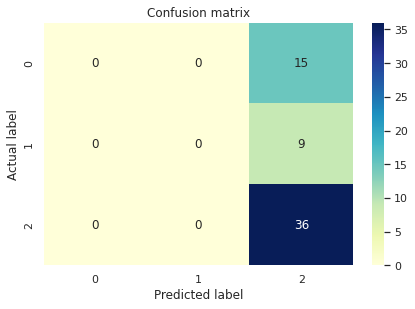

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Step 9: Tuning Model
####Note:<br>
Default max_iter is 100. <br>
For that it gives score of 0.56667 and it while fitting I got a warning : <br>ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
<br><br>
Updating max_iter to 200 I had a better score of 0.63333 but I still got the  same warning
<br><br>
On updating max_iter to 300 I got the same score of 0.63333 and had no warning

In [ ]:
from tqdm.notebook import tqdm_notebook
import time
for i in tqdm_notebook(range(10)):
  param_grid = [    
      {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'C' : np.logspace(-4, 4, 20),
      'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
      'max_iter' : [100, 1000,2500, 5000]
      }
  ]

  clf = GridSearchCV(LogReg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

  best_clf = clf.fit(X,y)

  0%|          | 0/10 [00:00<?, ?it/s]

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [ ]:
  print(f'Best estimator{best_clf.best_estimator_}')
  print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Best estimatorLogisticRegression(C=0.615848211066026, l1_ratio=0.5, max_iter=1000,
                   random_state=42, solver='newton-cg')
Accuracy - : 0.742


Conclusion:<br>

*   I was able to understand that logistic regression yields a better score when the data is properly cleaned
*   I was able to understand that data plays a major role in the correctness of the result

